In [2]:
import pandas as pd

df=pd.read_csv('d:/data/basket/dvdtrans.csv')
print(df.shape)
df.head()

(30, 2)


,ID,Item
0,1,Sixth Sense
1,1,LOTR1
2,1,Harry Potter1
3,1,Green Mile
4,1,LOTR2


In [5]:
# 2차원 리스트로 읽기
items=[]
for row in range(0, df.shape[0]):
    items.append([df.iloc[row,0], str(df.iloc[row,1])])

items

[[1, 'Sixth Sense'],
 [1, 'LOTR1'],
 [1, 'Harry Potter1'],
 [1, 'Green Mile'],
 [1, 'LOTR2'],
 [2, 'Gladiator'],
 [2, 'Patriot'],
 [2, 'Braveheart'],
 [3, 'LOTR1'],
 [3, 'LOTR2'],
 [4, 'Gladiator'],
 [4, 'Patriot'],
 [4, 'Sixth Sense'],
 [5, 'Gladiator'],
 [5, 'Patriot'],
 [5, 'Sixth Sense'],
 [6, 'Gladiator'],
 [6, 'Patriot'],
 [6, 'Sixth Sense'],
 [7, 'Harry Potter1'],
 [7, 'Harry Potter2'],
 [8, 'Gladiator'],
 [8, 'Patriot'],
 [9, 'Gladiator'],
 [9, 'Patriot'],
 [9, 'Sixth Sense'],
 [10, 'Sixth Sense'],
 [10, 'LOTR'],
 [10, 'Gladiator'],
 [10, 'Green Mile']]

In [6]:
result=[]
for i in range(1,11):
    row=[]
    for item in items:
        if item[0]==i:
            row.append(item[1])
    result.append(row)

result

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart'],
 ['LOTR1', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']]

In [7]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te=TransactionEncoder()
t_arr=te.fit(result).transform(result)
print(te.columns_)
print(type(t_arr))
df2=pd.DataFrame(t_arr, columns=te.columns_)
df2

['Braveheart', 'Gladiator', 'Green Mile', 'Harry Potter1', 'Harry Potter2', 'LOTR', 'LOTR1', 'LOTR2', 'Patriot', 'Sixth Sense']
<class 'numpy.ndarray'>


,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,False,False,True,True,False,False,True,True,False,True
1,True,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,True,False,False
3,False,True,False,False,False,False,False,False,True,True
4,False,True,False,False,False,False,False,False,True,True
5,False,True,False,False,False,False,False,False,True,True
6,False,False,False,True,True,False,False,False,False,False
7,False,True,False,False,False,False,False,False,True,False
8,False,True,False,False,False,False,False,False,True,True
9,False,True,True,False,False,True,False,False,False,True


In [8]:
from mlxtend.frequent_patterns import apriori

frequent=apriori(df2, min_support=0.2, use_colnames=True)
frequent

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(Green Mile)
2,0.2,(Harry Potter1)
3,0.2,(LOTR1)
4,0.2,(LOTR2)
5,0.6,(Patriot)
6,0.6,(Sixth Sense)
7,0.6,"(Patriot, Gladiator)"
8,0.5,"(Sixth Sense, Gladiator)"
9,0.2,"(Sixth Sense, Green Mile)"


In [9]:
# 신뢰도 0.1 기준
from mlxtend.frequent_patterns import association_rules

rules=association_rules(frequent, metric='confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


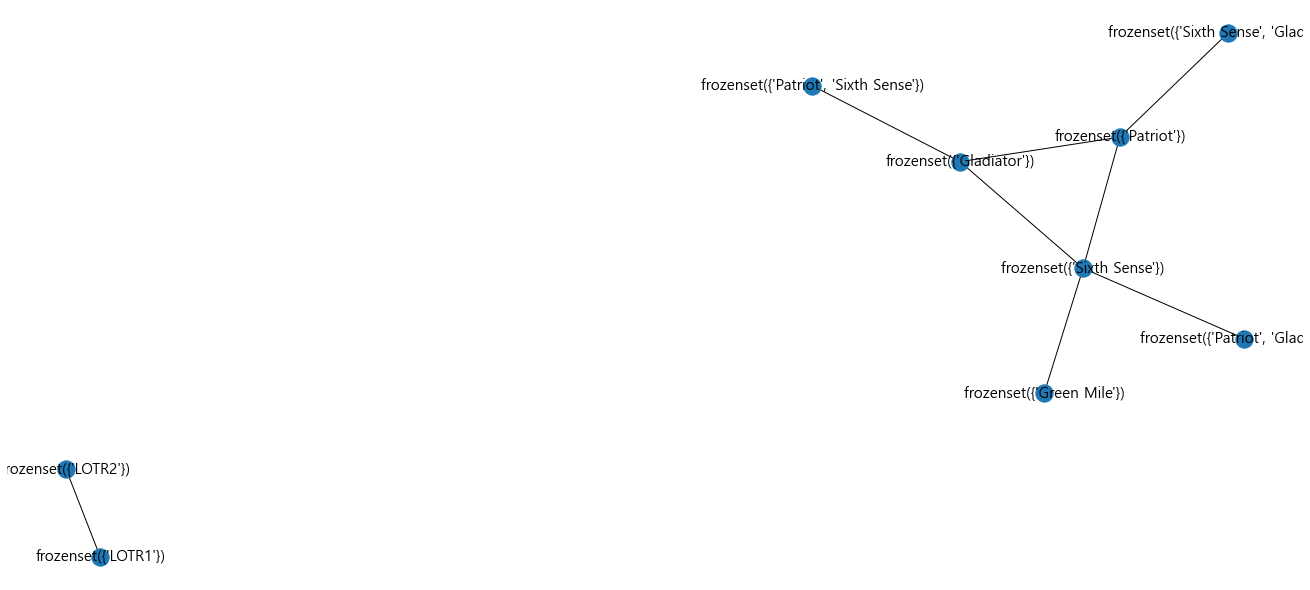

In [13]:
from matplotlib import font_manager, rc
import networkx as nx
import matplotlib.pyplot as plt

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

ga=nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(18,8))
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)